# Análise simples dos vereadores que mais ajudam a população da cidade de Jacareí

Dado retirado do portal da transparência de Jacareí - http://egov.jacarei.sp.gov.br/pmjacarei/websis/portal_transparencia/financeiro/contas_publicas/index.php?consulta=../lei_acesso/lai_remuneracoes

##### Primeiro passo é importação das pacotes necessários para que possamos fazer a análise


In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(ggthemes))
suppressMessages(library(ggthemr))
suppressMessages(library(knitr))

Próximo passo é realizar a leitura dos conjuntos de dados no site da prefeitura de Jacareí


In [2]:
# mes de junho
junho <- read.csv2(file="../../../dados/dados_remuneracao_vereadores-jacarei/jac_junho_2018.csv", sep=",", stringsAsFactors = FALSE)

# mes de julho
julho <- read.csv2(file="../../../dados/dados_remuneracao_vereadores-jacarei/jac_julho_2018.csv", sep=",", stringsAsFactors = FALSE)

# mes de agosto
agosto <- read.csv2(file="../../../dados/dados_remuneracao_vereadores-jacarei/jac_agosto_2018.csv", sep=",", stringsAsFactors = FALSE)

Como o número de vereadores é fixo, basta juntarmos os dados aos nível de linha, porque precisamos de todas as informações dos três meses. De qualquer forma, é sempre importante observarmos os nossos dados antes de criar quaisquer modelos estatísticos.

In [5]:
head(junho, 2)
head(julho, 2)
head(agosto, 2)

Ano,Atendimento.aos.munícipes,Diárias.de.Viagens,Gasolina.Álcool..Litros.,Gasolina.Álcool..R..,Impressão.Colorida,Manutenção.de.Veículos,Material.de.Escritório,Mês,Telefonia.Fixa,Telefonia.Móvel,Vereador,Xerox..Central.,Xerox..Duplicadora.,Xerox..Gabinete.
2018,41,0,45.999,197.33571,163,40,446.91,Junho,91.43,19.81,Abner de Madureira,0,0,1082
2018,162,0,37.95,162.8055,248,60,86.01,Junho,86.64,18.08,Aderbal Sodré,0,0,2472


Ano,Atendimento.aos.munícipes,Diárias.de.Viagens,Gasolina.Álcool..Litros.,Gasolina.Álcool..R..,Impressão.Colorida,Manutenção.de.Veículos,Material.de.Escritório,Mês,Telefonia.Fixa,Telefonia.Móvel,Vereador,Xerox..Central.,Xerox..Duplicadora.,Xerox..Gabinete.
2018,43,0,44989,188.68,293,40,32.97,Julho,130.65,58.89,Abner de Madureira,0,0,1659
2018,182,0,72278,303.13,279,50,105,Julho,34.74,16.95,Aderbal Sodré,0,0,1635


Ano,Atendimento.aos.munícipes,Diárias.de.Viagens,Gasolina.Álcool..Litros.,Gasolina.Álcool..R..,Impressão.Colorida,Manutenção.de.Veículos,Material.de.Escritório,Mês,Telefonia.Fixa,Telefonia.Móvel,Vereador,Xerox..Central.,Xerox..Duplicadora.,Xerox..Gabinete.
2018,64,0,87342,353.3,277,0,531.83,Agosto,202.61,101.17,Abner de Madureira,0,0,2043
2018,220,0,43331,175.27,223,320,70.85,Agosto,52.69,38.93,Aderbal Sodré,257,0,2474


In [6]:
sum(is.na(junho))
sum(is.na(julho))
sum(is.na(agosto))

[1] 0

[1] 0

[1] 0

Já que o dado parece limpo, podemos proseguir com a nossa análise. Precisamos juntar nossos conjuntos de dados, utilizados o bind_rows para reunir os conjuntos pelas linhas, selecionamos todas as colunas e criamos levels para poder ordenar nossos meses.

In [7]:
conjunto_meses <- bind_rows(junho, julho, agosto) %>%
  select(everything()) %>%
  mutate(Mês = factor(Mês, levels = c("Junho",
                                      "Julho",
                                      "Agosto")))

Vamos selecionar um tema legal no pacote gthemr, quero ver qual vereador que mais ajudou os munícipes em Jacareí. Para isso vamos usar o atributo 'Atendimento.aos.munícipes'no eixo y e o nome dos vereadores no eixo x, é importante criar um grupo de mês para que haja uma ligação com os vereadores e a quantidade de atendimento aos munícipes.

Warning message:
“New theme missing the following elements: panel.grid, plot.tag, plot.tag.position”

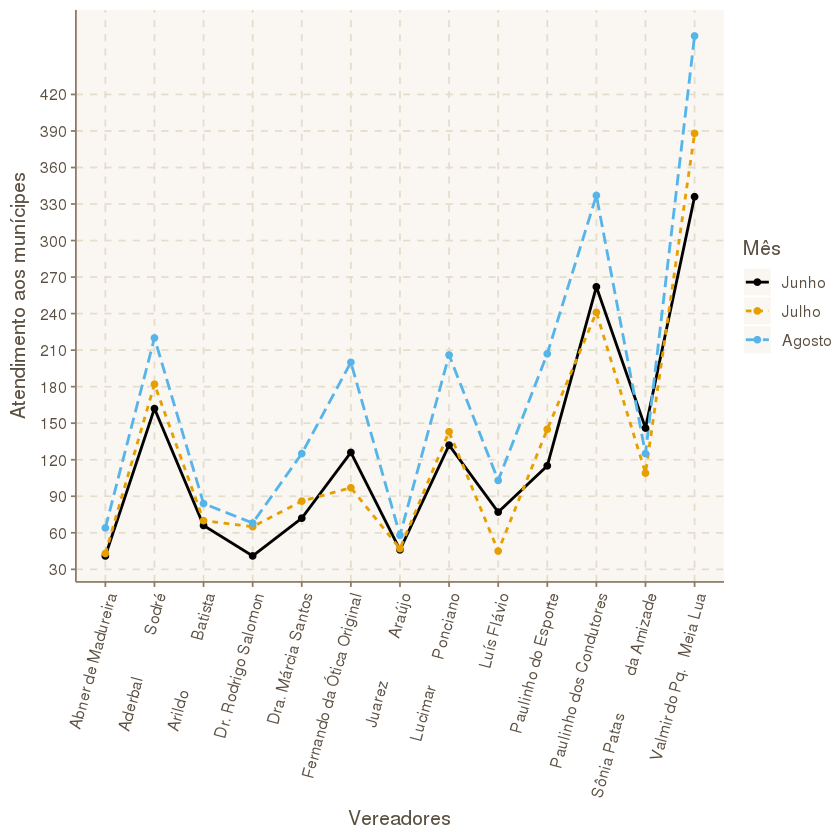

In [8]:
ggthemr("dust")
ggplot(conjunto_meses, aes(x=Vereador,
           y=Atendimento.aos.munícipes,
           colour=Mês,
           group=Mês)) +
  geom_line(aes(linetype=Mês), size=0.8) +
  geom_point() +
  theme(axis.text.x = element_text(angle = 75,
                                   hjust = 1)) +
  xlab("Vereadores") +
  ylab("Atendimento aos munícipes") +
  scale_y_continuous(breaks = seq(0,420,30)) +
  scale_colour_colorblind()


É possível notar uma leve tendência, com o decorrer dos meses parece há uma leve alta nas ajudas. Vamos observar em barras e tentar comprovas essa tendência.

Warning message:
“New theme missing the following elements: panel.grid, plot.tag, plot.tag.position”

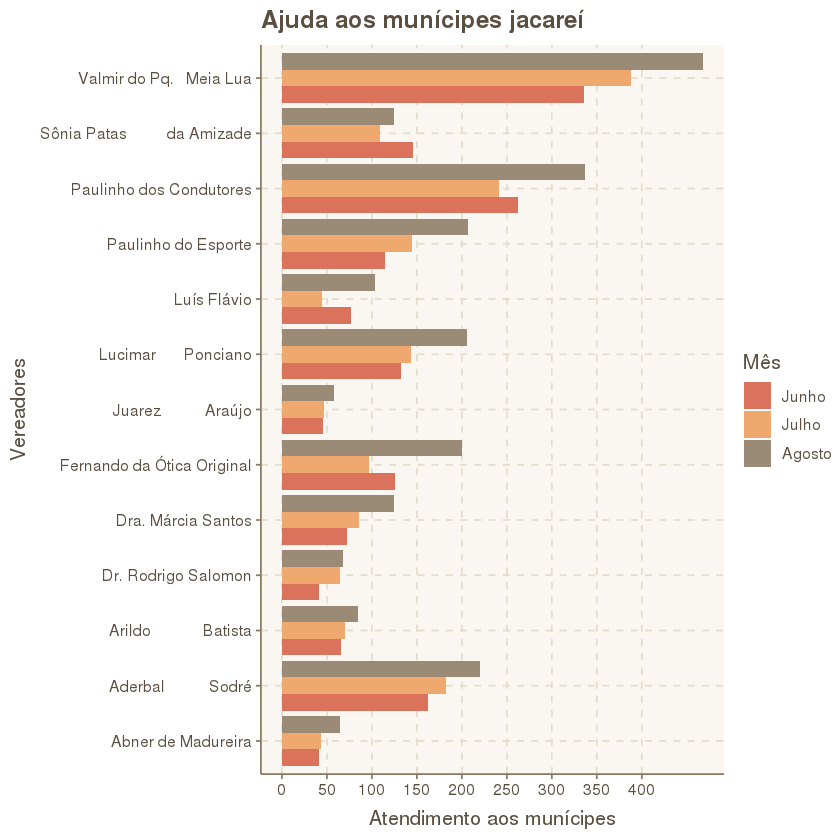

In [9]:
ggthemr("dust")
ggplot(conjunto_meses, aes(x=Vereador,
                           y=Atendimento.aos.munícipes,
                           group=Mês)) +
  geom_col(position = "dodge",
           aes(fill = Mês))+
  theme(axis.text.x = element_text(angle = 0,
                                   hjust = 0.5)) +
  coord_flip() +
  xlab("Vereadores") +
  ylab("Atendimento aos munícipes") +
  ggtitle("Ajuda aos munícipes jacareí") +
  scale_y_continuous(breaks = seq(0,400,50))

Parece que essa tendência se comprova, para a maioria dos vereados, há um crescimento no número de pessoas que recebem ajuda dos mesmos. Claro que não podemos concluir nada analisando apenas três meses, caso haja alguma rivalidade, na minha opinião, a tendência é continuar crescendo.